In [1]:
# Fund managers report their holdings every month.
# They don't want to tell their investors that they lost money on mem stocks
# So at the end of the month they sell low-qualitry assets and buy high-quality assets, like bonds
# We might be able to take advantage of this by buying bonds at the end of the month and selling them at the beginning of the month

In [3]:
# Impoer dependencies
import pandas as pd
import numpy as np
import yfinance as yf

In [4]:
# Get data for TLT (our bond proxy)
tlt = yf.download("TLT",start='2002-01-01',end='2022-12-31')

[*********************100%***********************]  1 of 1 completed


In [5]:
tlt.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2002-07-30,81.750000,81.900002,81.519997,81.519997,41.130573,6100
2002-07-31,81.949997,82.800003,81.900002,82.529999,41.640190,29400
2002-08-01,82.540001,83.019997,82.540001,83.000000,41.877308,25000
2002-08-02,83.160004,84.099998,82.879997,83.849998,42.306194,52800
2002-08-05,84.040001,84.440002,83.849998,84.220001,42.492867,61100


In [6]:
# Coompute log returns
tlt['log_return'] = np.log(tlt["Adj Close"] / tlt["Adj Close"].shift(1))

In [7]:
# add column for calendar day of the month
tlt['day-of-month'] = tlt.index.day

# add column for yea
tlt['year'] = tlt.index.year

In [8]:
tlt.head()

,Open,High,Low,Close,Adj Close,Volume,log_return,day-of-month,year
Date,,,,,,,,,
2002-07-30,81.750000,81.900002,81.519997,81.519997,41.130573,6100,NaN,30,2002
2002-07-31,81.949997,82.800003,81.900002,82.529999,41.640190,29400,0.012314,31,2002
2002-08-01,82.540001,83.019997,82.540001,83.000000,41.877308,25000,0.005678,1,2002
2002-08-02,83.160004,84.099998,82.879997,83.849998,42.306194,52800,0.010189,2,2002
2002-08-05,84.040001,84.440002,83.849998,84.220001,42.492867,61100,0.004403,5,2002


In [9]:
# We expect positive returns in TLT toward the end of the month
# We think this is when fund managers buy TLT
# We think there will be negative returns in TLT toward the beginning of the month
# This is when fund managers sell their high-quality assets and go backk to buying meme stocks

<AxesSubplot: title={'center': 'Mean Log Returns by Calendar Day of Month'}, xlabel='day-of-month'>

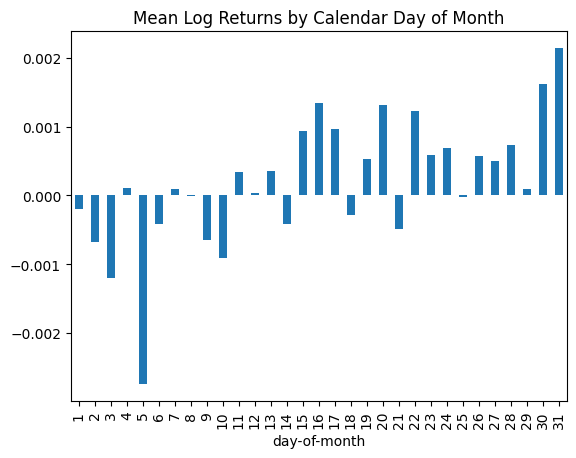

In [12]:
# Get mean return for each day of the month
grouped_by_day = tlt.groupby("day-of-month")["log_return"].mean()

# Plot the data
grouped_by_day.plot.bar(title="Mean Log Returns by Calendar Day of Month")

In [13]:
# We see evidence that returns are positive during the last days of the month and negative during the earlier days

In [14]:
# Now we build a naive strategy to test hypothesis
#   *buy and hold TLT during the last week of the month
#   *Short and hold TLT during the first week of the month

In [18]:
# Initiate new column and set = 0.0
tlt['first_week_returns'] = 0.0
# From tlt df select rows where day-of-month is less than 7 & column is 'first_week_returns'
tlt.loc[tlt['day-of-month'] <= 7, "first_week_returns" ] = tlt['log_return']

# Initiate new column and set = 0.0
tlt['last_week_returns'] = 0.0
tlt.loc[tlt['day-of-month'] >= 23, "last_week_returns" ] = tlt['log_return']

tlt['last_week_less_first_week'] = tlt['last_week_returns'] - tlt['first_week_returns']

tlt.head(20)

,Open,High,Low,Close,Adj Close,Volume,log_return,day-of-month,year,first_week_returns,last_week_returns,last_week_less_first_week
Date,,,,,,,,,,,,
2002-07-30,81.750000,81.900002,81.519997,81.519997,41.130573,6100,NaN,30,2002,0.000000,NaN,NaN
2002-07-31,81.949997,82.800003,81.900002,82.529999,41.640190,29400,0.012314,31,2002,0.000000,0.012314,0.012314
2002-08-01,82.540001,83.019997,82.540001,83.000000,41.877308,25000,0.005678,1,2002,0.005678,0.000000,-0.005678
2002-08-02,83.160004,84.099998,82.879997,83.849998,42.306194,52800,0.010189,2,2002,0.010189,0.000000,-0.010189
2002-08-05,84.040001,84.440002,83.849998,84.220001,42.492867,61100,0.004403,5,2002,0.004403,0.000000,-0.004403
2002-08-06,83.870003,83.900002,83.220001,83.500000,42.129578,64900,-0.008586,6,2002,-0.008586,0.000000,0.008586
2002-08-07,83.599998,84.139999,83.360001,83.699997,42.230507,40300,0.002393,7,2002,0.002393,0.000000,-0.002393
2002-08-08,83.580002,83.769997,83.360001,83.699997,42.230507,40900,0.000000,8,2002,0.000000,0.000000,0.000000
2002-08-09,84.000000,84.879997,84.000000,84.879997,42.825848,35900,0.013999,9,2002,0.000000,0.000000,0.000000


In [20]:
# Next step is to spend the shortest amount of time possible to determine if the strategy is worth pursuing

<AxesSubplot: title={'center': 'Mean Log Strategy Returns by Year'}, xlabel='year'>

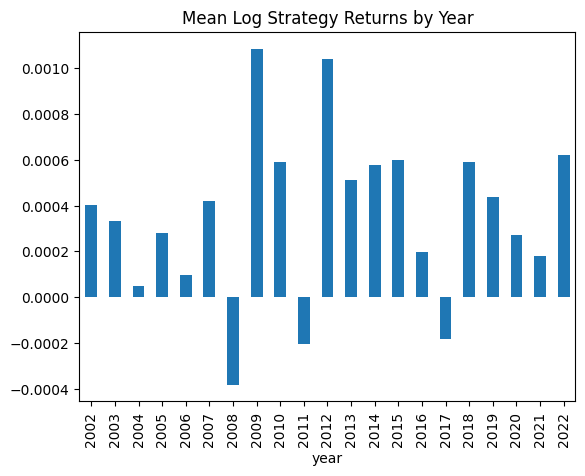

In [19]:
tlt.groupby("year")["last_week_less_first_week"].mean().plot.bar(title="Mean Log Strategy Returns by Year")

<AxesSubplot: title={'center': 'Sumulative Sum of Returns by Year'}, xlabel='year'>

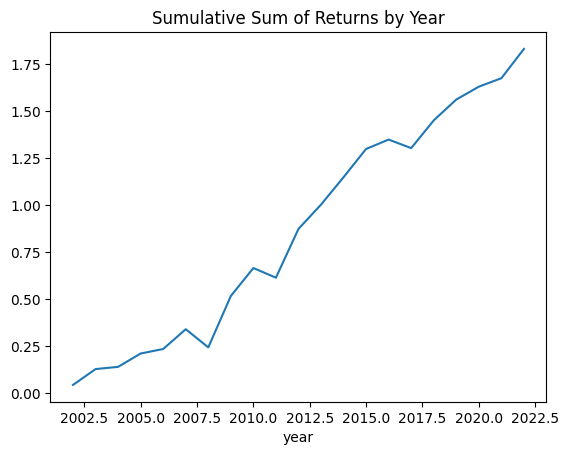

In [21]:
tlt.groupby("year")["last_week_less_first_week"].sum().cumsum().plot(title="Sumulative Sum of Returns by Year")

<AxesSubplot: title={'center': 'Cumulative Sum of Returns by Day'}, xlabel='Date'>

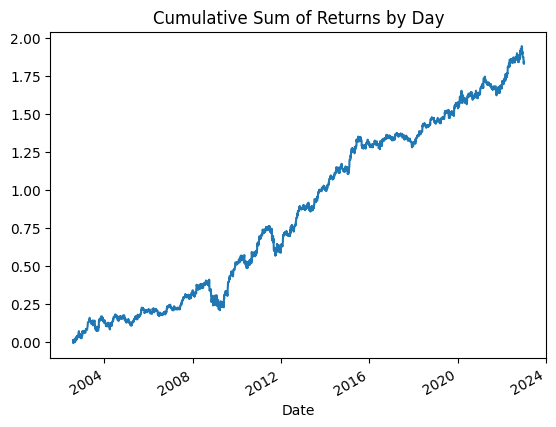

In [24]:
tlt["last_week_less_first_week"].cumsum().plot(title="Cumulative Sum of Returns by Day")

In [23]:
# There is evidence that this could be profitable so it's worth exploring more deeply